# MLAI_BScCompIT_Sept20_CA3
## Caue Duarte
## 2017228

In [11]:
import pandas as pd
import numpy as np
import matplotlib as plot
import seaborn as sns

In [7]:
data = pd.read_csv("glass_data.csv", names=["id","Refractive_Index","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type_Of_Glass"])

In [13]:
data.head()

,id,Refractive_Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


-- 1 buildingwindowsfloatprocessed 

-- 2 buildingwindowsnonfloatprocessed 

-- 3 vehiclewindowsfloatprocessed

-- 4 vehiclewindowsnonfloatprocessed (none in this database)

-- 5 containers

-- 6 tableware

-- 7 headlamps

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                214 non-null    int64  
 1   Refractive_Index  214 non-null    float64
 2   Na                214 non-null    float64
 3   Mg                214 non-null    float64
 4   Al                214 non-null    float64
 5   Si                214 non-null    float64
 6   K                 214 non-null    float64
 7   Ca                214 non-null    float64
 8   Ba                214 non-null    float64
 9   Fe                214 non-null    float64
 10  Type_Of_Glass     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [9]:
data.describe()

,id,Refractive_Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_Of_Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [14]:
data.isna().sum()

id                  0
Refractive_Index    0
Na                  0
Mg                  0
Al                  0
Si                  0
K                   0
Ca                  0
Ba                  0
Fe                  0
Type_Of_Glass       0
dtype: int64

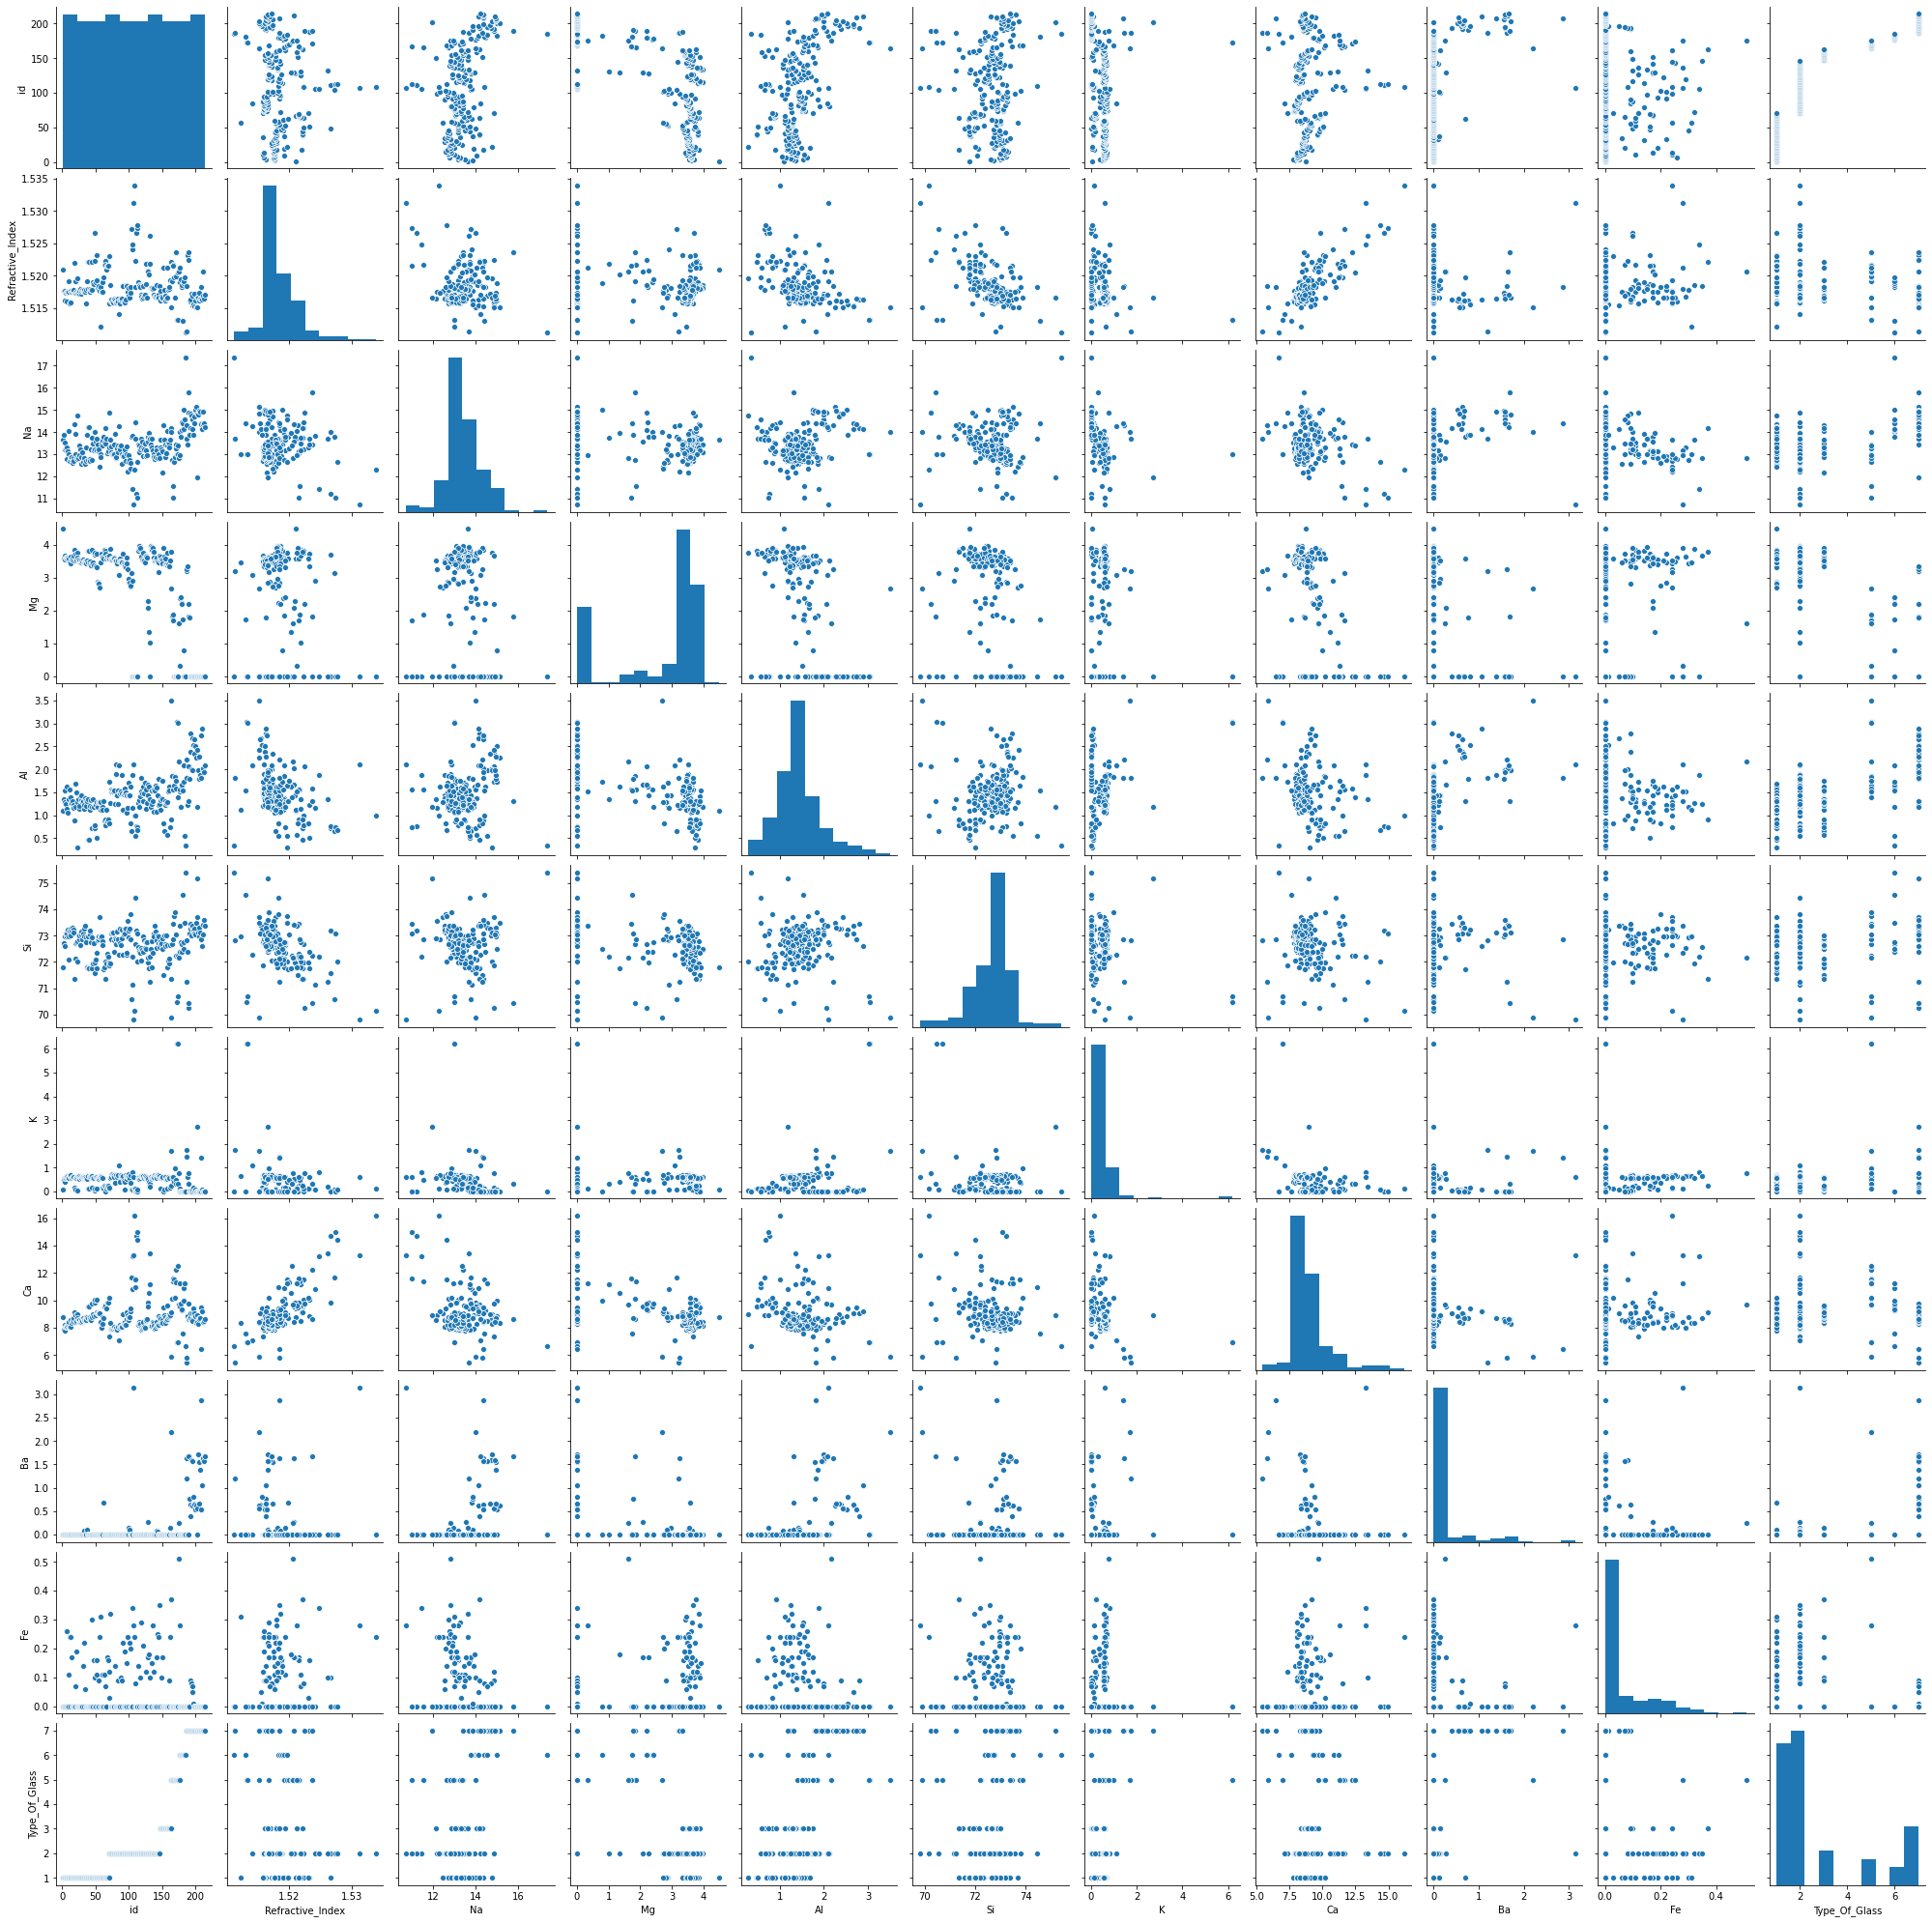

In [12]:
sns.pairplot(data)

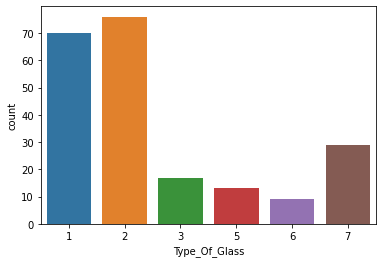

In [16]:
sns.countplot(data=data, x='Type_Of_Glass')